In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_excel("urbun city data.xlsx") 

print(data.head())

   Year  Green(Coverd)Percent  Precipitationper(mm)  \
0  2005                 53.00                1014.7   
1  2005                 51.32                1038.3   
2  2005                 50.54                1019.3   
3  2005                 51.08                1047.0   
4  2005                 52.53                 961.6   

   Baseline(Temperature) in C  
0                       25.29  
1                       25.24  
2                       25.37  
3                       25.46  
4                       25.29  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        350 non-null    int64  
 1   Green(Coverd)Percent        350 non-null    float64
 2   Precipitationper(mm)        350 non-null    float64
 3   Baseline(Temperature) in C  350 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.1 KB
None


In [4]:
print(data.describe())


              Year  Green(Coverd)Percent  Precipitationper(mm)  \
count   350.000000            350.000000            350.000000   
mean   2014.491429             37.562057            894.710571   
std       5.557069              7.302019             76.795621   
min    2005.000000             26.000000            750.000000   
25%    2010.000000             31.635000            835.975000   
50%    2014.500000             36.100000            892.550000   
75%    2019.000000             43.242500            951.700000   
max    2024.000000             53.000000           1074.400000   

       Baseline(Temperature) in C  
count                  350.000000  
mean                    25.592800  
std                      0.252399  
min                     24.930000  
25%                     25.400000  
50%                     25.610000  
75%                     25.770000  
max                     26.370000  


In [5]:
print(data.isnull().sum())


Year                          0
Green(Coverd)Percent          0
Precipitationper(mm)          0
Baseline(Temperature) in C    0
dtype: int64


In [6]:
data = data.dropna()


In [7]:
data.columns = ["Year", "Green", "Rainfall", "Temperature"]

In [8]:
print(data.head())

   Year  Green  Rainfall  Temperature
0  2005  53.00    1014.7        25.29
1  2005  51.32    1038.3        25.24
2  2005  50.54    1019.3        25.37
3  2005  51.08    1047.0        25.46
4  2005  52.53     961.6        25.29


In [9]:
print(data.corr())

                 Year     Green  Rainfall  Temperature
Year         1.000000 -0.830524 -0.523309     0.553514
Green       -0.830524  1.000000  0.821472    -0.777578
Rainfall    -0.523309  0.821472  1.000000    -0.804481
Temperature  0.553514 -0.777578 -0.804481     1.000000


In [10]:
print("Green vs Temperature:", data["Green"].corr(data["Temperature"]))

Green vs Temperature: -0.7775777279380051


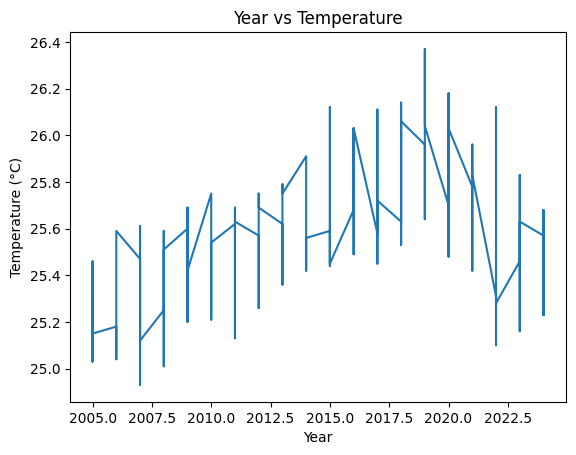

In [11]:
plt.figure()
plt.plot(data["Year"], data["Temperature"])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Year vs Temperature")
plt.show()

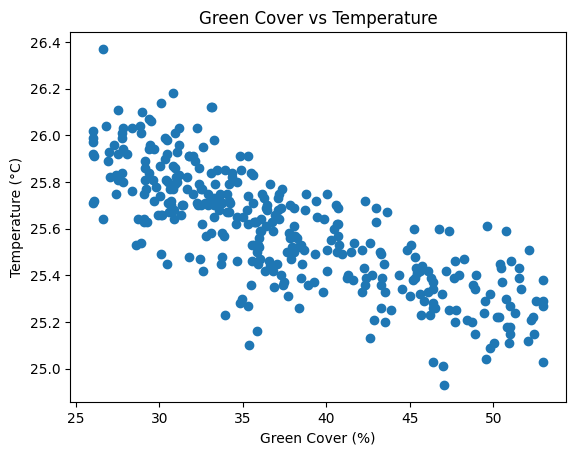

In [12]:
plt.figure()
plt.scatter(data["Green"], data["Temperature"])
plt.xlabel("Green Cover (%)")
plt.ylabel("Temperature (°C)")
plt.title("Green Cover vs Temperature")
plt.show()

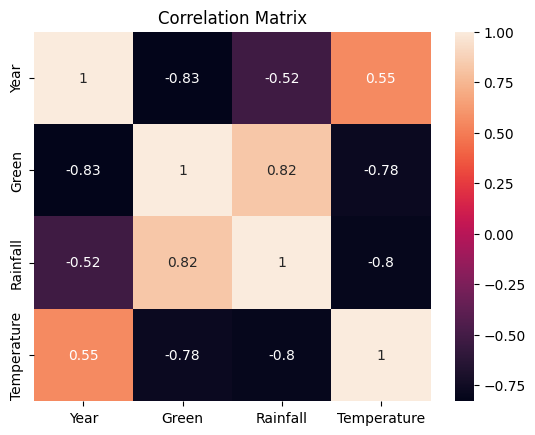

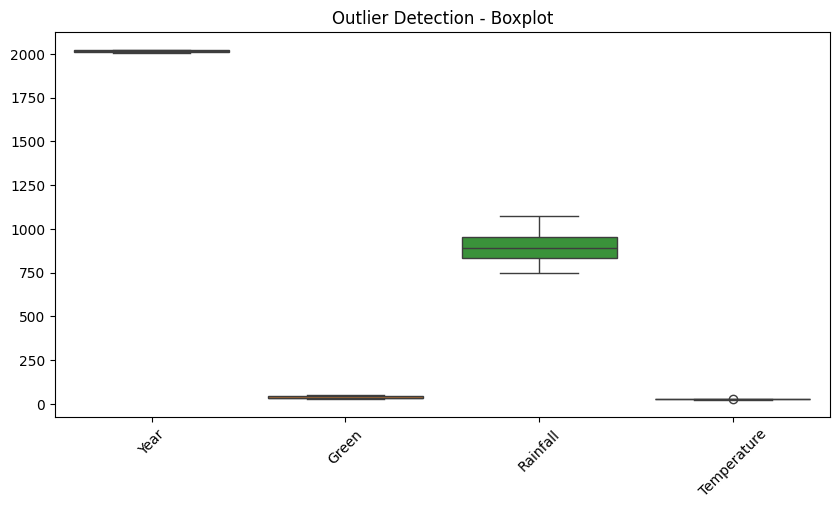

In [16]:
plt.figure()
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()
plt.figure(figsize=(10,5))
numeric_data = data.select_dtypes(include=np.number)
sns.boxplot(data=numeric_data)
plt.title("Outlier Detection - Boxplot")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[["Green"]]
y = data["Temperature"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 26.60237150656211
Slope: -0.026877428537060093


In [ ]:
print("R2 Score:", model.score(X, y))


R2 Score: 0.6046271229852297
